## Semaine 2

In [2]:
!pip install torch torchvision torchaudio
!pip install pandas numpy scikit-learn matplotlib


  Using cached torchvision-0.22.0-cp310-cp310-win_amd64.whl (1.7 MB)
  Using cached torchaudio-2.7.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.22.0+cu118
    Uninstalling torchvision-0.22.0+cu118:
      Successfully uninstalled torchvision-0.22.0+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.7.0+cu118
    Uninstalling torchaudio-2.7.0+cu118:
      Successfully uninstalled torchaudio-2.7.0+cu118


You should consider upgrading via the 'C:\Users\medta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\medta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import os
import pandas as pd

# Chemin absolu
DATA_PATH = "C:/Users/medta/OneDrive/Desktop/SDU/Week2/data/movielens/ml-1m/"

# Spécifie l'encodage en 'latin1' pour éviter l'erreur UnicodeDecodeError
users = pd.read_csv(os.path.join(DATA_PATH, "users.dat"), sep="::", engine="python",
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], encoding="latin1")

ratings = pd.read_csv(os.path.join(DATA_PATH, "ratings.dat"), sep="::", engine="python",
                      names=["UserID", "MovieID", "Rating", "Timestamp"], encoding="latin1")

movies = pd.read_csv(os.path.join(DATA_PATH, "movies.dat"), sep="::", engine="python",
                     names=["MovieID", "Title", "Genres"], encoding="latin1")

print("Users dataset:\n", users.head())
print("\nRatings dataset:\n", ratings.head())
print("\nMovies dataset:\n", movies.head())


Users dataset:
    UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

Ratings dataset:
    UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Movies dataset:
    MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encodage des UserID et MovieID
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

ratings["UserID"] = user_encoder.fit_transform(ratings["UserID"])
ratings["MovieID"] = item_encoder.fit_transform(ratings["MovieID"])

# Vérification des encodages
print("\nEncoded Ratings dataset:\n", ratings.head())



Encoded Ratings dataset:
    UserID  MovieID  Rating  Timestamp
0       0     1104       5  978300760
1       0      639       3  978302109
2       0      853       3  978301968
3       0     3177       4  978300275
4       0     2162       5  978824291


In [5]:
# Création de la matrice User-Item binaire
user_item_binary_matrix = ratings.pivot(index="UserID", columns="MovieID", values="Rating").fillna(0)

# Conversion des valeurs en 1 ou 0
user_item_binary_matrix = user_item_binary_matrix.applymap(lambda x: 1 if x > 0 else 0)

print("\nUser-Item Binary Interaction Matrix:\n", user_item_binary_matrix.head())
print("\nShape of Binary User-Item Matrix:", user_item_binary_matrix.shape)


C:\Users\medta\AppData\Local\Temp\ipykernel_26176\2046812022.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_item_binary_matrix = user_item_binary_matrix.applymap(lambda x: 1 if x > 0 else 0)



User-Item Binary Interaction Matrix:
 MovieID  0     1     2     3     4     5     6     7     8     9     ...  \
UserID                                                               ...   
0           1     0     0     0     0     0     0     0     0     0  ...   
1           0     0     0     0     0     0     0     0     0     0  ...   
2           0     0     0     0     0     0     0     0     0     0  ...   
3           0     0     0     0     0     0     0     0     0     0  ...   
4           0     0     0     0     0     1     0     0     0     0  ...   

MovieID  3696  3697  3698  3699  3700  3701  3702  3703  3704  3705  
UserID                                                               
0           0     0     0     0     0     0     0     0     0     0  
1           0     0     0     0     0     0     0     0     0     0  
2           0     0     0     0     0     0     0     0     0     0  
3           0     0     0     0     0     0     0     0     0     0  
4       

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Crée une matrice binaire si ce n'est pas déjà fait
user_item_binary_matrix = ratings.pivot(index="UserID", columns="MovieID", values="Rating").fillna(0)
user_item_binary_matrix = user_item_binary_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Normalisation des données
scaler = StandardScaler()
user_item_matrix_scaled = scaler.fit_transform(user_item_binary_matrix)

# Clustering des utilisateurs
NUM_CLUSTERS = 10
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
user_clusters = kmeans.fit_predict(user_item_matrix_scaled)

# Ajouter les clusters aux utilisateurs
users["Cluster"] = user_clusters

# Vérification
print(users.head())
print("\nColonnes disponibles :", users.columns)


C:\Users\medta\AppData\Local\Temp\ipykernel_26176\3275257656.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_item_binary_matrix = user_item_binary_matrix.applymap(lambda x: 1 if x > 0 else 0)


   UserID Gender  Age  Occupation Zip-code  Cluster
0       1      F    1          10    48067        3
1       2      M   56          16    70072        3
2       3      M   25          15    55117        3
3       4      M   45           7    02460        3
4       5      M   25          20    55455        3

Colonnes disponibles : Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'Cluster'], dtype='object')


In [7]:
import networkx as nx
import matplotlib.pyplot as plt


In [8]:
# Création du graphe bipartite User-Item
G_ui = nx.Graph()

# Ajout des nœuds utilisateur et item
user_nodes = [f"U_{user}" for user in user_item_binary_matrix.index]
item_nodes = [f"I_{item}" for item in user_item_binary_matrix.columns]

G_ui.add_nodes_from(user_nodes, bipartite=0)  # Utilisateurs
G_ui.add_nodes_from(item_nodes, bipartite=1)  # Items

# Ajout des arêtes avec des poids
for user_id, row in user_item_binary_matrix.iterrows():
    for item_id, interaction in row.items():  # Correction ici
        if interaction == 1:
            G_ui.add_edge(f"U_{user_id}", f"I_{item_id}", weight=1)

print(f"User-Item Graph - Nodes: {G_ui.number_of_nodes()}, Edges: {G_ui.number_of_edges()}")


User-Item Graph - Nodes: 9746, Edges: 1000209


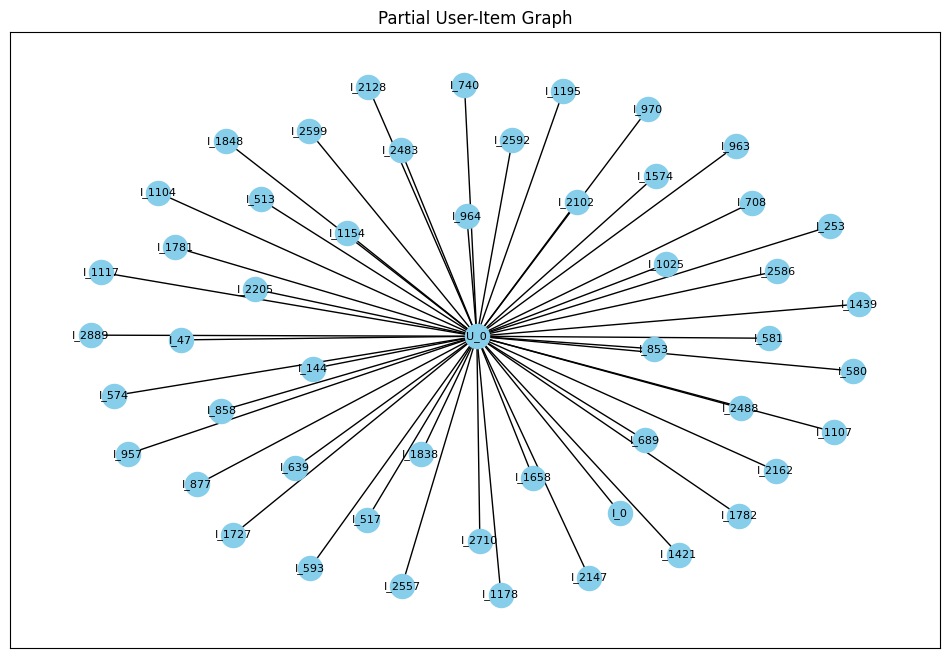

In [9]:
# Visualisation du sous-graphe
subgraph = list(G_ui.edges())[:50]  # On limite à 50 arêtes pour éviter le surchargement

plt.figure(figsize=(12, 8))
nx.draw_networkx(G_ui.edge_subgraph(subgraph), with_labels=True, node_size=300, font_size=8, node_color="skyblue")
plt.title("Partial User-Item Graph")
plt.show()


In [10]:
print(users.head())
print("\nColonnes disponibles :", users.columns)


   UserID Gender  Age  Occupation Zip-code  Cluster
0       1      F    1          10    48067        3
1       2      M   56          16    70072        3
2       3      M   25          15    55117        3
3       4      M   45           7    02460        3
4       5      M   25          20    55455        3

Colonnes disponibles : Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'Cluster'], dtype='object')


In [11]:
# Création du graphe User-User basé sur les clusters
G_uu = nx.Graph()

# Parcours des clusters
for cluster_id in users["Cluster"].unique():
    cluster_users = users[users["Cluster"] == cluster_id].index
    
    # Connecter tous les utilisateurs du même cluster
    for user_a in cluster_users:
        for user_b in cluster_users:
            if user_a != user_b:
                G_uu.add_edge(f"U_{user_a}", f"U_{user_b}", weight=1)

print(f"User-User Graph - Nodes: {G_uu.number_of_nodes()}, Edges: {G_uu.number_of_edges()}")


User-User Graph - Nodes: 6035, Edges: 11346054


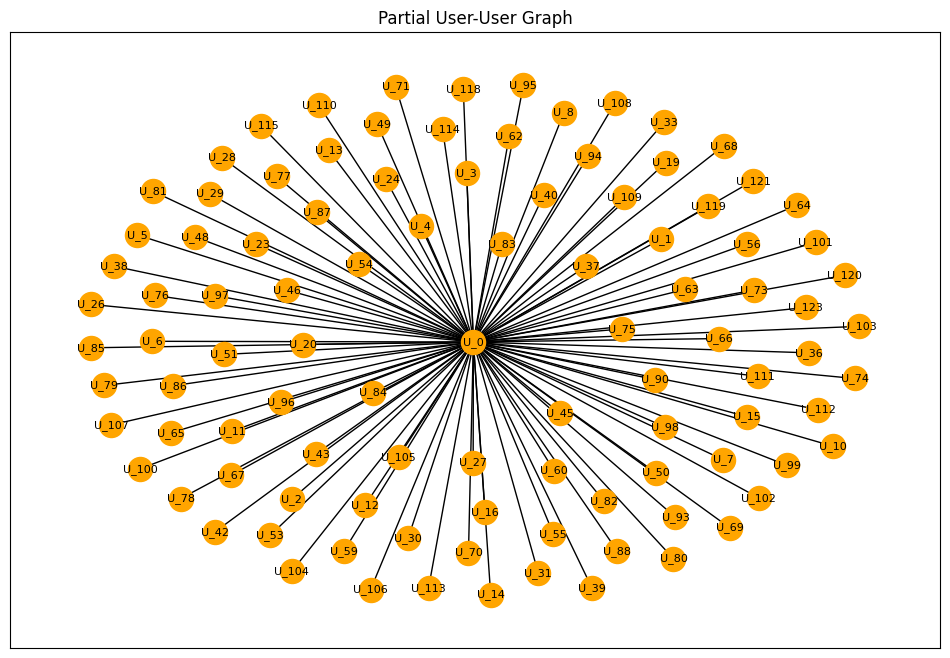

In [12]:
# Visualisation du sous-graphe User-User
subgraph_uu = list(G_uu.edges())[:100]

plt.figure(figsize=(12, 8))
nx.draw_networkx(G_uu.edge_subgraph(subgraph_uu), with_labels=True, node_size=300, font_size=8, node_color="orange")
plt.title("Partial User-User Graph")
plt.show()


In [13]:
import pickle

# Chemins de sauvegarde
graph_path = "data/graphs/"

# Créer le dossier s'il n'existe pas
os.makedirs(graph_path, exist_ok=True)

# Sauvegarder le graphe User-Item
with open(os.path.join(graph_path, "user_item_graph.pkl"), "wb") as f:
    pickle.dump(G_ui, f)

# Sauvegarder le graphe User-User
with open(os.path.join(graph_path, "user_user_graph.pkl"), "wb") as f:
    pickle.dump(G_uu, f)

print("Graphs saved successfully!")


Graphs saved successfully!


In [17]:
import os
import pickle

# Define the graph paths
graph_path = "data/graphs/"
ui_graph_path = os.path.join(graph_path, "user_item_graph.pkl")
uu_graph_path = os.path.join(graph_path, "user_user_graph.pkl")

# Check if the files exist
print("Files in 'data/graphs/':", os.listdir(graph_path))


Files in 'data/graphs/': ['user_item_graph.pkl', 'user_user_graph.pkl']


In [18]:
# Load User-Item Graph
with open(ui_graph_path, "rb") as f:
    G_ui_loaded = pickle.load(f)

# Load User-User Graph
with open(uu_graph_path, "rb") as f:
    G_uu_loaded = pickle.load(f)

print(f"User-Item Graph - Nodes: {G_ui_loaded.number_of_nodes()}, Edges: {G_ui_loaded.number_of_edges()}")
print(f"User-User Graph - Nodes: {G_uu_loaded.number_of_nodes()}, Edges: {G_uu_loaded.number_of_edges()}")


User-Item Graph - Nodes: 9746, Edges: 1000209
User-User Graph - Nodes: 6035, Edges: 11346054


In [20]:
import numpy as np
import networkx as nx

# Convert User-Item Graph to adjacency matrix
A_ui = nx.adjacency_matrix(G_ui_loaded).toarray()

# Convert User-User Graph to adjacency matrix
A_uu = nx.adjacency_matrix(G_uu_loaded).toarray()

print("Shape of User-Item Adjacency Matrix:", A_ui.shape)
print("Shape of User-User Adjacency Matrix:", A_uu.shape)


Shape of User-Item Adjacency Matrix: (9746, 9746)
Shape of User-User Adjacency Matrix: (6035, 6035)


In [22]:
# Feature matrix for User-Item Graph
X_ui = np.eye(A_ui.shape[0])

# Feature matrix for User-User Graph
X_uu = np.eye(A_uu.shape[0])

print("Shape of User-Item Feature Matrix:", X_ui.shape)
print("Shape of User-User Feature Matrix:", X_uu.shape)


Shape of User-Item Feature Matrix: (9746, 9746)
Shape of User-User Feature Matrix: (6035, 6035)


In [23]:
# Directory to save matrices
matrices_path = "data/matrices/"
os.makedirs(matrices_path, exist_ok=True)

# Save adjacency matrices
np.save(os.path.join(matrices_path, "A_ui.npy"), A_ui)
np.save(os.path.join(matrices_path, "A_uu.npy"), A_uu)

# Save feature matrices
np.save(os.path.join(matrices_path, "X_ui.npy"), X_ui)
np.save(os.path.join(matrices_path, "X_uu.npy"), X_uu)

print("Matrices saved successfully!")


Matrices saved successfully!


## Semaine 3

In [24]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Apply Spectral Clustering
NUM_CLUSTERS = 10
spectral = SpectralClustering(n_clusters=NUM_CLUSTERS, affinity='nearest_neighbors', random_state=42)
spectral_clusters = spectral.fit_predict(user_item_matrix_scaled)

# Assign Spectral Clusters to users
users["Spectral_Cluster"] = spectral_clusters

# Compare KMeans and Spectral Clustering
print("\nComparison of KMeans vs Spectral Clustering:\n")
print(users[["Cluster", "Spectral_Cluster"]].head())



Comparison of KMeans vs Spectral Clustering:

   Cluster  Spectral_Cluster
0        3                 1
1        3                 3
2        3                 1
3        3                 3
4        3                 1


In [25]:
# Calculate Silhouette Scores
kmeans_silhouette = silhouette_score(user_item_matrix_scaled, users["Cluster"])
spectral_silhouette = silhouette_score(user_item_matrix_scaled, users["Spectral_Cluster"])

print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Spectral Clustering Silhouette Score: {spectral_silhouette:.4f}")


KMeans Silhouette Score: 0.2777
Spectral Clustering Silhouette Score: -0.1454


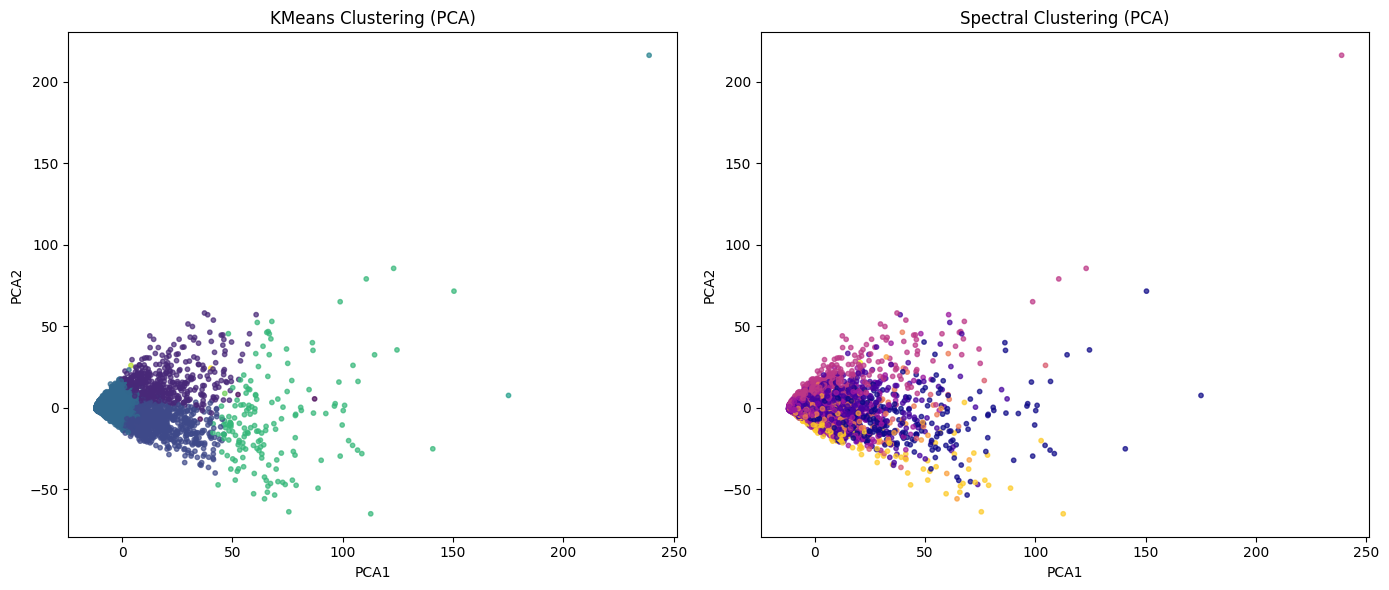

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
user_item_pca = pca.fit_transform(user_item_matrix_scaled)

# Add PCA components to DataFrame
users["PCA1"] = user_item_pca[:, 0]
users["PCA2"] = user_item_pca[:, 1]

# Plot KMeans Clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title("KMeans Clustering (PCA)")
plt.scatter(users["PCA1"], users["PCA2"], c=users["Cluster"], cmap='viridis', s=10, alpha=0.7)
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# Plot Spectral Clusters
plt.subplot(1, 2, 2)
plt.title("Spectral Clustering (PCA)")
plt.scatter(users["PCA1"], users["PCA2"], c=users["Spectral_Cluster"], cmap='plasma', s=10, alpha=0.7)
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.tight_layout()
plt.show()


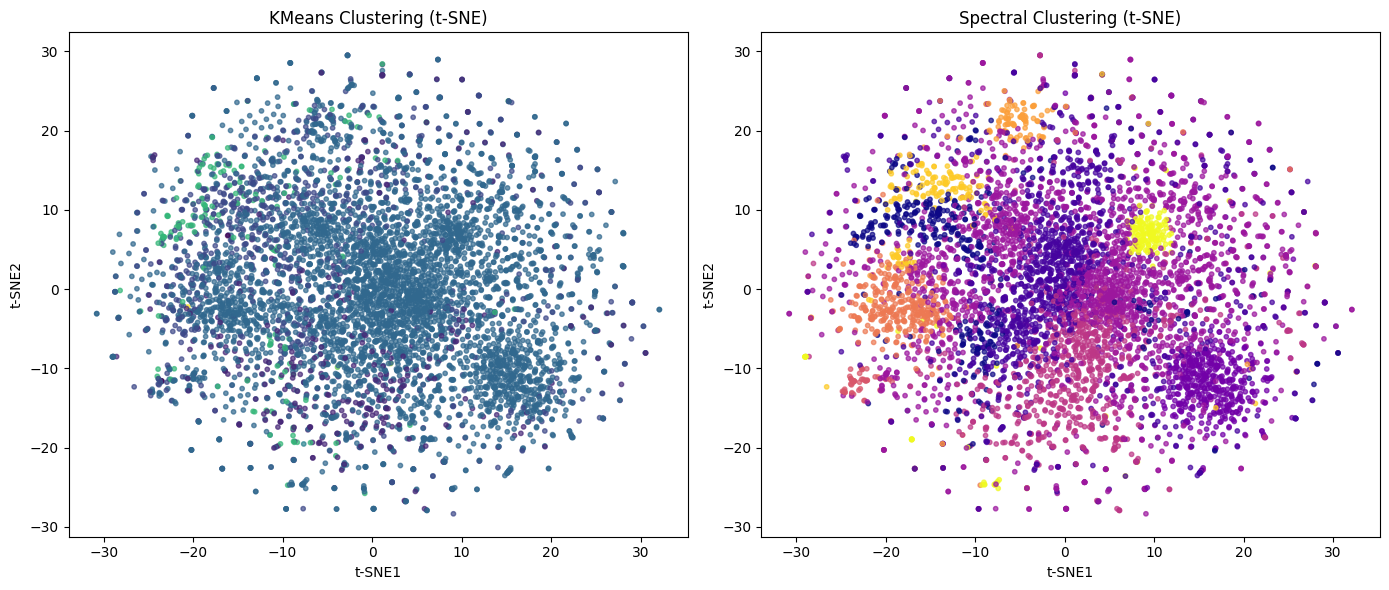

In [27]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
user_item_tsne = tsne.fit_transform(user_item_matrix_scaled)

# Add t-SNE components to DataFrame
users["tSNE1"] = user_item_tsne[:, 0]
users["tSNE2"] = user_item_tsne[:, 1]

# Plot KMeans Clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title("KMeans Clustering (t-SNE)")
plt.scatter(users["tSNE1"], users["tSNE2"], c=users["Cluster"], cmap='viridis', s=10, alpha=0.7)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

# Plot Spectral Clusters
plt.subplot(1, 2, 2)
plt.title("Spectral Clustering (t-SNE)")
plt.scatter(users["tSNE1"], users["tSNE2"], c=users["Spectral_Cluster"], cmap='plasma', s=10, alpha=0.7)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

plt.tight_layout()
plt.show()


In [28]:
# Directory to save cluster data
cluster_path = "data/clusters/"
os.makedirs(cluster_path, exist_ok=True)

# Save KMeans and Spectral Clusters
users[["UserID", "Cluster", "Spectral_Cluster"]].to_csv(os.path.join(cluster_path, "user_clusters.csv"), index=False)

print("Cluster assignments saved to 'data/clusters/user_clusters.csv'")


Cluster assignments saved to 'data/clusters/user_clusters.csv'


## Semaine 4


In [29]:
# Recharger les clusters Spectral
cluster_path = "data/clusters/user_clusters.csv"
user_clusters = pd.read_csv(cluster_path)

# Créer un nouveau graphe User-User basé sur les clusters Spectral
G_uu_updated = nx.Graph()

# Parcours des clusters Spectral
for cluster_id in user_clusters["Spectral_Cluster"].unique():
    cluster_users = user_clusters[user_clusters["Spectral_Cluster"] == cluster_id]["UserID"].tolist()

    # Connecter les utilisateurs du même cluster Spectral
    for user_a in cluster_users:
        for user_b in cluster_users:
            if user_a != user_b:
                G_uu_updated.add_edge(f"U_{user_a}", f"U_{user_b}", weight=1)

print(f"Updated User-User Graph - Nodes: {G_uu_updated.number_of_nodes()}, Edges: {G_uu_updated.number_of_edges()}")


Updated User-User Graph - Nodes: 6040, Edges: 3960802


In [30]:
# Recalculer les matrices d'adjacence
A_ui_updated = nx.adjacency_matrix(G_ui).toarray()
A_uu_updated = nx.adjacency_matrix(G_uu_updated).toarray()

print("Shape of Updated User-Item Adjacency Matrix:", A_ui_updated.shape)
print("Shape of Updated User-User Adjacency Matrix:", A_uu_updated.shape)


Shape of Updated User-Item Adjacency Matrix: (9746, 9746)
Shape of Updated User-User Adjacency Matrix: (6040, 6040)


In [32]:
# Nombre de clusters Spectral
num_clusters = user_clusters["Spectral_Cluster"].nunique()

# Mettre à jour la taille des matrices de caractéristiques
X_uu_updated = np.eye(A_uu_updated.shape[0])

# Créer la matrice de clusters séparée
X_uu_clusters = np.zeros((A_uu_updated.shape[0], num_clusters))

# Ajouter l'information de cluster dans la matrice User-User
for idx, row in user_clusters.iterrows():
    user_id = row["UserID"]
    spectral_cluster = row["Spectral_Cluster"]
    
    # Sécuriser les index
    if user_id < X_uu_updated.shape[0] and spectral_cluster < num_clusters:
        X_uu_clusters[user_id, spectral_cluster] = 1

# Fusionner la matrice identité et la matrice de clusters
X_uu_updated = np.hstack((X_uu_updated, X_uu_clusters))

print("Shape of Updated Feature Matrix for User-User Graph:", X_uu_updated.shape)
print("First 5 rows:\n", X_uu_updated[:5])


Shape of Updated Feature Matrix for User-User Graph: (6040, 6050)
First 5 rows:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
# Chemins de sauvegarde
updated_matrices_path = "data/matrices_updated/"
os.makedirs(updated_matrices_path, exist_ok=True)

# Sauvegarder les matrices d'adjacence mises à jour
np.save(os.path.join(updated_matrices_path, "A_ui_updated.npy"), A_ui_updated)
np.save(os.path.join(updated_matrices_path, "A_uu_updated.npy"), A_uu_updated)

# Sauvegarder les matrices de caractéristiques mises à jour
np.save(os.path.join(updated_matrices_path, "X_ui_updated.npy"), X_ui_updated)
np.save(os.path.join(updated_matrices_path, "X_uu_updated.npy"), X_uu_updated)

print("Updated matrices saved successfully in 'data/matrices_updated/'")


Updated matrices saved successfully in 'data/matrices_updated/'
